# Product Recommendation System for Amazon Beauty Products:

#### A well developed recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.
- The below recommendation system is based on the journey of a new customer from the time he/she lands on the business’s website for the first time to the time when he/she makes repeat purchases.

#### **The recommendation system is designed in 3 parts based on the business requirement:**

- **Recommendation system part 1:** Product popularity based system targeted at new customers. These kind of systems provide great strategy to target the new customers with the most popular products sold on a business's website and is very useful to start a recommendation engine.

- **Recommendation system part 2:** Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who also bought similar items. 

---

**Summary:** When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

---

In [1]:
## Importing all required libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### About The Dataset:

In [2]:
data = pd.read_csv('ratings_Beauty.csv')
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [3]:
print("Dimensions of data set are: " , data.shape)
print("Total number of unique Users are:" , len(data['UserId'].unique()))
print("Total number of unique Products are:" , len(data['ProductId'].unique()))

Dimensions of data set are:  (2023070, 4)
Total number of unique Users are: 1210271
Total number of unique Products are: 249274


### <center>Recommendation System - Type 1: Product popularity based system targeted at new customers</center>

In [4]:
## Considering we need to recommend products to one new user of website. 
## We'll recommend our top 20 most rated products to the user.

top_20_prod = data.groupby(['ProductId']).Rating.count().sort_values(ascending = False).head(20)
top_20_prod

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
B000ZMBSPE    2041
B003BQ6QXK    1918
B004OHQR1Q    1885
B00121UVU0    1838
B000FS05VG    1589
B000142FVW    1558
B0046VGPHQ    1475
B001JKTTVQ    1468
B004INUWX0    1430
B000TKH6G2    1379
B00150LT40    1349
B0048O2R1E    1349
B003S516XO    1347
B00188IFHS    1341
B0056GDG90    1333
Name: Rating, dtype: int64

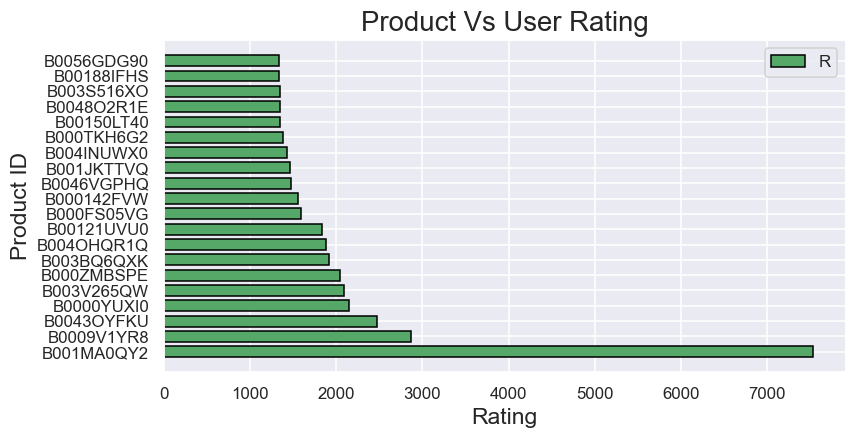

In [5]:
plt.figure(dpi = 110 , figsize = (8,4))
plt.barh(width =data.groupby(['ProductId']).Rating.count().sort_values(ascending = False).head(20).values ,
         y = top_20_prod.index.astype('str') , height = 0.7 , color = 'g' , edgecolor = 'black')
plt.title("Product Vs User Rating" , fontsize = 18)
plt.xlabel("Rating" , fontsize = 15)
plt.ylabel("Product ID" , fontsize = 15)
plt.legend("Rating" , loc = 'upper right')

- Above 20 Products are the most highly rated beauty products of Amazon. 
- With 'B001MA0QY2' being the most highly rated product followed by 'B0009V1YR8'.<br>
### These products can be recommended to a new user on the platform. <br>
**These kind of basic recommendation engine largely used by E-commerce giants nowadays. We can further improve user targeting by introducing new parameters like : 'Festival Season' , 'Age' , 'Region' etc**

<hr>

### <center>Recommendation System - Type 2: Model-based collaborative filtering system</center>

- **What Is Collaborative Filtering?**<br>
Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

In [7]:
## Reading data....
data_piv = data.head(90000).pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
data_piv.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B0002DLBBW,B0002DLCCA,B0002DLEJG,B0002DLEMI,B0002DLGOO,B0002DLILU,B0002DLJ9G,B0002DLJGE,B0002DLJGY,B0002DLJZU
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00700212KB3K0MVESPIY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01247753D6GFZD87MUV8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01379141PEJ6FIH7UH38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
## Transposing the data frame....
data_trans = data_piv.T
data_trans.head()

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A00700212KB3K0MVESPIY,A01247753D6GFZD87MUV8,A01379141PEJ6FIH7UH38,A0143622X8ZC66HZXLUP,A01437583CZ7V02UKZQ5S,A01456542S5QPYUEGJXR8,A01907982I6OHXDYN5HD6,A020135981U0UNEAE4JV,...,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZSAMMJPJKJ1,AZZSNN1LC94VF,AZZTJQ7CQZUD8,AZZVCBG5G4EV8,AZZWJ3LICUEKJ,AZZWPNME0GQZ2,AZZZLM1E5JJ8C
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
## Appliying dimensionality reduction to above data frame.....
from sklearn.decomposition import  TruncatedSVD 

## 'TruncatedSVD' is dimensional reduction tool which is specially used for sparse matrix.
## This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 
## Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. 
## This means it can work with sparse matrices efficiently.

dim_red = TruncatedSVD(n_components = 20)
reduced_data = dim_red.fit_transform(data_trans)

In [16]:
reduced_data.shape

(5451, 20)

In [21]:
Correlation_matrix = np.corrcoef(reduced_data)

In [73]:
## Enter your last bought product's Unique ID....
product_id = input("Enter value:" )

Enter value:0762451459


In [74]:
## Creating product list....
product_list = list(data_trans.index)
product = product_list.index(product_id)
print("The index position of product is :" , product)

The index position of product is : 4


In [103]:
## Finding all highly correlated products....
corr_scores = pd.Series(Correlation_matrix[product])
corr_scores.index = data_trans.index
corr_scores.sort_values(ascending = False , inplace = True)

## Creating recommend product list by taking top 10 most correlated products....
recommend = list(corr_scores.head(20).index)
recommend.remove(product_id)

## Priniting list of all recommended products are....
print("Top 10 Recommended Products are: \n" , pd.DataFrame(recommend[0:10] , columns = ['Products']))

Top 10 Recommended Products are: 
      Products
0  B00028POBK
1  B00015JO60
2  B0000AR6XQ
3  B00008LUPB
4  B0000Y3C2O
5  B0000CBJ4T
6  B00008CMP1
7  B0001B74RA
8  B00005A77G
9  B0000UTUVU


###### This recommendation system will give top 10 products using Collaborative Filtering Method. 
- These recommendation is based on the last bought product of user and buying trend of other users with similar persona. 
- We can further optimize this model for better user experience by creating more specific models considering other parameters like User age, Region, Interest, Season etc

<hr><hr>